# **Introdução ao Processamento Digital de Imagens**
**Trabalho Prático**
Desenvolva, em uma linguagem de programação de sua escolha, um sistema para abrir, 
exibir, manipular e salvar imagens RGB com 24 bits/pixel (8 bits/componente/pixel). Não 
use bibliotecas ou funções especiais de processamento de imagens. O sistema deve ter a 
seguinte funcionalidade:


## **Common libraries**

In [1]:
# %pip install opencv-python
# %pip install matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt


## **1. Conversão RGB-HSB-RGB**
Utilize as conversões RGB->HSB e HSB->RGB descritas em
https://www.codeproject.com/Articles/19045/Manipulating-colors-in-NET-Part-1.

In [2]:
# RGB->HSB
def my_rgb_to_hsb(rgb_img):
    # Dados da imagem de entrada
    np_img = np.array(rgb_img)
    r = np_img[:,:,0]
    g = np_img[:,:,1]
    b = np_img[:,:,2]

    # Normalização 
    r = r/255.0
    g = g/255.0
    b = b/255.0

    # Cálculo do valor máximo e mínimo
    np_max = np.maximum(r, np.maximum(g, b))
    np_min = np.minimum(r, np.minimum(g, b))

    # Dados da saída (matrizes)
    h = np.zeros_like(r, dtype=np.float32)
    s = np.zeros_like(r, dtype=np.float32)

    # Hue
    h = np.where(np.logical_and(np_max == r, g >= b), 
            np.where(np.logical_and(np_max - np_min != 0, np_max != 0),
                60 * (g - b) / (np_max - np_min), 0), h)
    h = np.where(np.logical_and(np_max == r, g < b),
            np.where(np.logical_and(np_max - np_min != 0, np_max != 0),
                 60 * (g - b) / (np_max - np_min) + 360, 0), h)
    h = np.where(np_max == g, 
            np.where(np.logical_and(np_max - np_min != 0, np_max != 0),
                 60 * (b - r) /  (np_max - np_min) + 120, 0), h)
    h = np.where(np_max == b,
            np.where(np.logical_and(np_max - np_min != 0, np_max != 0),
                 60 * (r - g) /  (np_max - np_min) + 240, 0), h)

    # Saturation
    s = np.where(np_max == 0, 0, (1 - (np_min / np_max)) )

    return h, s, np_max
        

C:\Users\luccas.matheus\AppData\Local\Temp\ipykernel_14404\4138397915.py:25: RuntimeWarning: invalid value encountered in divide
  60 * (g - b) / (np_max - np_min), 0), h)
C:\Users\luccas.matheus\AppData\Local\Temp\ipykernel_14404\4138397915.py:28: RuntimeWarning: invalid value encountered in divide
  60 * (g - b) / (np_max - np_min) + 360, 0), h)
C:\Users\luccas.matheus\AppData\Local\Temp\ipykernel_14404\4138397915.py:31: RuntimeWarning: invalid value encountered in divide
  60 * (b - r) /  (np_max - np_min) + 120, 0), h)
C:\Users\luccas.matheus\AppData\Local\Temp\ipykernel_14404\4138397915.py:34: RuntimeWarning: invalid value encountered in divide
  60 * (r - g) /  (np_max - np_min) + 240, 0), h)
C:\Users\luccas.matheus\AppData\Local\Temp\ipykernel_14404\4138397915.py:37: RuntimeWarning: invalid value encountered in divide
  s = np.where(np_max == 0, 0, (1 - (np_min / np_max)) )


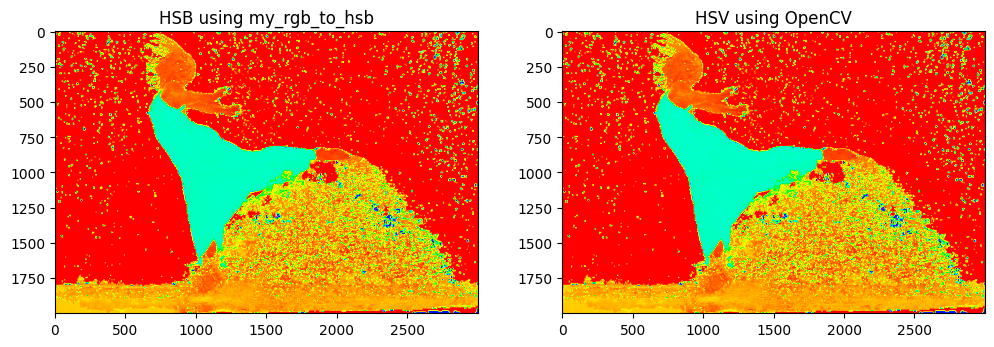

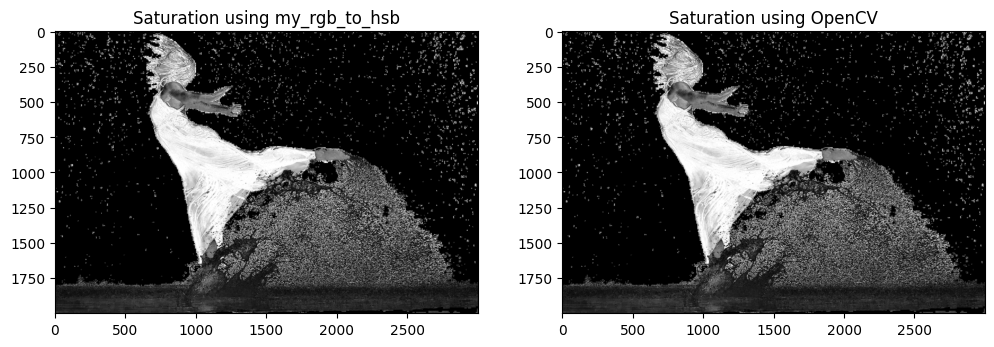

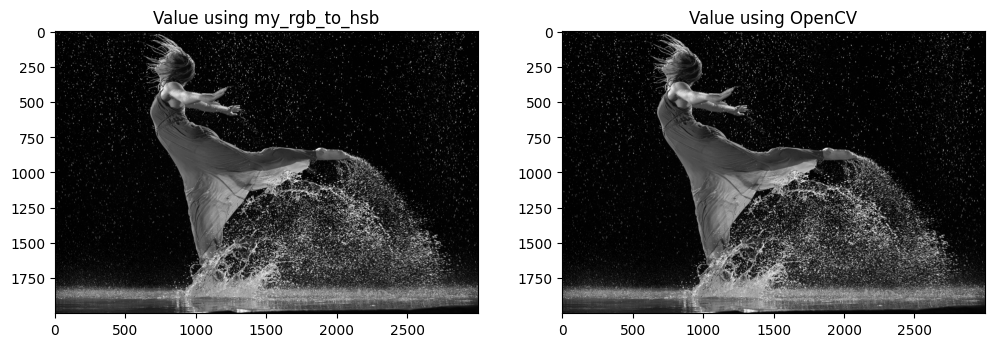

In [3]:
# Teste
sample_img = cv2.imread('./Resources/DancingInWater.jpg', cv2.IMREAD_COLOR)
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)  # Convert to RGB

# HSB using my_rgb_to_hsb
h, s, b = my_rgb_to_hsb(sample_img)

# HSV using OpenCV
hsv_img = cv2.cvtColor(sample_img, cv2.COLOR_RGB2HSV)

# Plot side by side (H)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(h, cmap='hsv')
plt.title('HSB using my_rgb_to_hsb')

plt.subplot(1, 2, 2)
plt.imshow(hsv_img[:, :, 0], cmap='hsv')
plt.title('HSV using OpenCV')
plt.show()

# Plot side by side (S)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(s, cmap='gray')
plt.title('Saturation using my_rgb_to_hsb')

plt.subplot(1, 2, 2)
plt.imshow(hsv_img[:, :, 1], cmap='gray')
plt.title('Saturation using OpenCV')
plt.show()

# Plot side by side (B)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(b, cmap='gray')
plt.title('Value using my_rgb_to_hsb')

plt.subplot(1, 2, 2)
plt.imshow(hsv_img[:, :, 2], cmap='gray')
plt.title('Value using OpenCV')
plt.show()





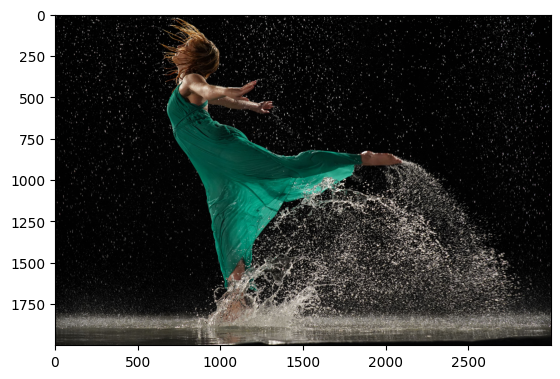

In [4]:
# HSB->RGB
def my_hsb_to_rgb(h, s, b):
    
    # Cálculo dos componentes
    c = b * s
    x = c * (1 - abs((h / 60) % 2 - 1))
    m = b - c

    # Inicialização das matrizes de saída
    r = np.zeros_like(h)
    g = np.zeros_like(h)
    b = np.zeros_like(h)

    # Condições para cada faixa de Hue
    mask = (h < 60)
    r[mask], g[mask], b[mask] = c[mask], x[mask], 0
    mask = (h >= 60) & (h < 120)
    r[mask], g[mask], b[mask] = x[mask], c[mask], 0
    mask = (h >= 120) & (h < 180)
    r[mask], g[mask], b[mask] = 0, c[mask], x[mask]
    mask = (h >= 180) & (h < 240)
    r[mask], g[mask], b[mask] = 0, x[mask], c[mask]
    mask = (h >= 240) & (h < 300)
    r[mask], g[mask], b[mask] = x[mask], 0, c[mask]
    mask = (h >= 300)
    r[mask], g[mask], b[mask] = c[mask], 0, x[mask]

    # Adição do valor mínimo a cada componente e normalização
    r = (r + m) * 255
    g = (g + m) * 255
    b = (b + m) * 255

    # Conversão para o tipo de dados original
    rgb_img = np.dstack((r, g, b)).astype(np.uint8)

    return rgb_img

_img = my_hsb_to_rgb(h, s, b)
plt.imshow(_img)

# 2. **Filtro  multiplicativo  de  saturação  e  de  brilho,  e  aditivo  de  matiz  no  HSB,  com posterior conversão a RGB**

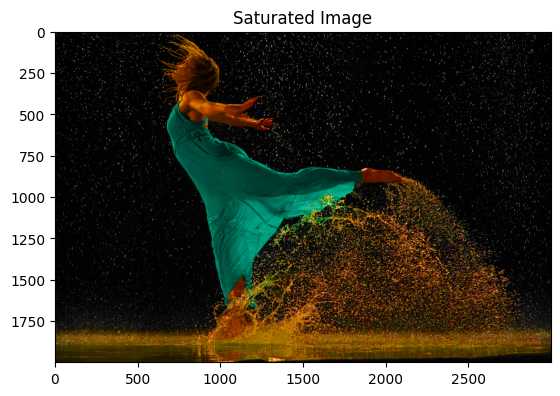

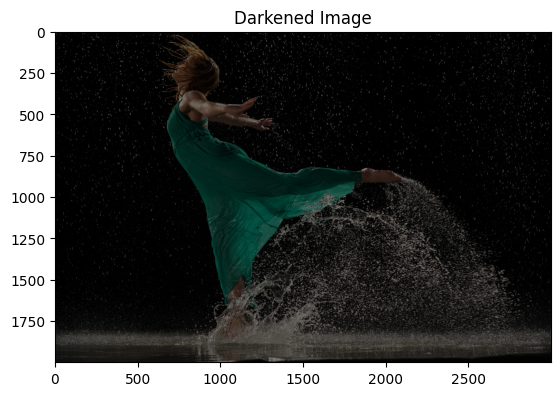

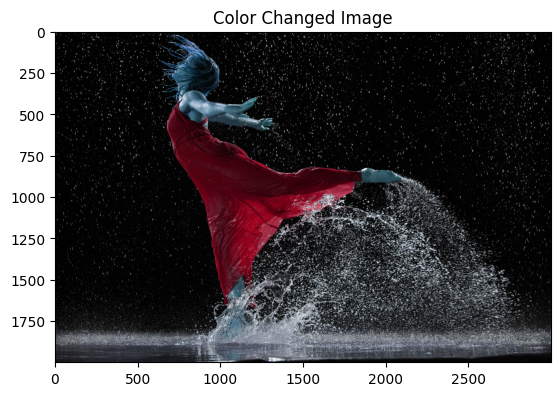

In [5]:
def hsb_filter_and_convert(h, s, b, h_add, s_mult, b_mult):
    # Adiciona matiz
    h = (h + h_add) % 360

    # Multiplica saturação e brilho
    # A função clip é usada para garantir que os valores fiquem entre 0 e 1.
    s = np.clip(s * s_mult, 0, 1)
    b = np.clip(b * b_mult, 0, 1)

    # Converte HSB para RGB usando a função existente
    rgb_img = my_hsb_to_rgb(h, s, b)

    return rgb_img

# Saturando a imagem
_img = hsb_filter_and_convert(h, s, b, h_add=0, s_mult=15, b_mult=1)
plt.title('Saturated Image')
plt.imshow(_img)
plt.show()

# Escurecendo a imagem
_img = hsb_filter_and_convert(h, s, b, h_add=0, s_mult=1, b_mult=0.5)
plt.title('Darkened Image')
plt.imshow(_img)
plt.show()

# Mudando a cor da imagem (o vestido ciano se torna vermelho)
_img = hsb_filter_and_convert(h, s, b, h_add=180, s_mult=1, b_mult=1)
plt.title('Color Changed Image')
plt.imshow(_img)
plt.show()



# 3. **Atribuição de saturação de uma imagem I1 a outra imagem I2, de mesmas dimensões.**

In [6]:
def grep_saturation_from_i1_to_i2(i1_rgb_img, i2_rgb_img):

    # Se as dimensões das imagens forem diferentes
    if i1_rgb_img.shape != i2_rgb_img.shape:
        # Solução 1: Redimensionar a imagem (extra)
        i2_rgb_img = cv2.resize(i2_rgb_img, (i1_rgb_img.shape[1], i1_rgb_img.shape[0]))
        # Solução 2: Levantar um erro e não prosseguir (requisito do exercício)
        # raise ValueError('As imagens devem ter o mesmo tamanho.') 
    # Convertendo a imagem para HSB e obtendo o vetor de saturação
    _, s1, _ = my_rgb_to_hsb(i1_rgb_img)

    # Filtrando a saturação
    h2, _, b2 = my_rgb_to_hsb(i2_rgb_img)

    # Convertendo de volta para RGB
    # Ou seja, imagem com a saturação de i1, e cor e brilho de i2
    return my_hsb_to_rgb(h2, s1, b2) 


C:\Users\luccas.matheus\AppData\Local\Temp\ipykernel_14404\4138397915.py:25: RuntimeWarning: invalid value encountered in divide
  60 * (g - b) / (np_max - np_min), 0), h)
C:\Users\luccas.matheus\AppData\Local\Temp\ipykernel_14404\4138397915.py:28: RuntimeWarning: invalid value encountered in divide
  60 * (g - b) / (np_max - np_min) + 360, 0), h)
C:\Users\luccas.matheus\AppData\Local\Temp\ipykernel_14404\4138397915.py:31: RuntimeWarning: invalid value encountered in divide
  60 * (b - r) /  (np_max - np_min) + 120, 0), h)
C:\Users\luccas.matheus\AppData\Local\Temp\ipykernel_14404\4138397915.py:34: RuntimeWarning: invalid value encountered in divide
  60 * (r - g) /  (np_max - np_min) + 240, 0), h)
C:\Users\luccas.matheus\AppData\Local\Temp\ipykernel_14404\4138397915.py:37: RuntimeWarning: invalid value encountered in divide
  s = np.where(np_max == 0, 0, (1 - (np_min / np_max)) )


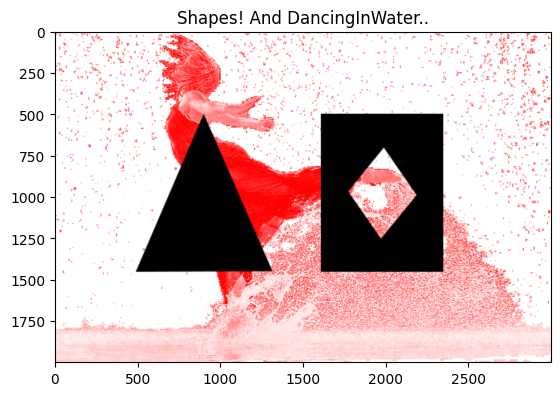

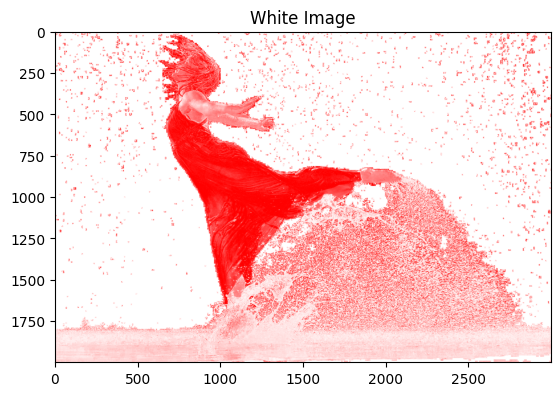

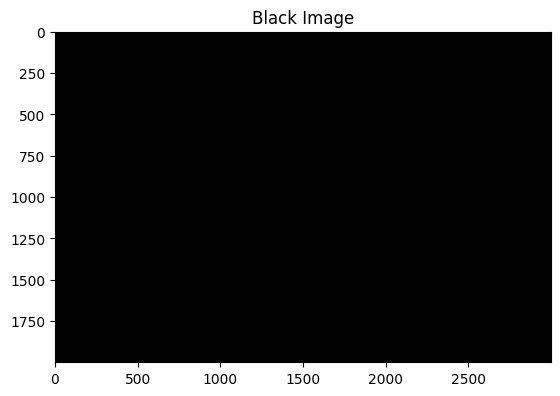

In [7]:

# Testes
i1_orig = cv2.imread('./Resources/DancingInWater.jpg', cv2.IMREAD_COLOR)
i2_shapes = cv2.imread('./Resources/Shapes.png', cv2.IMREAD_COLOR)
i1_orig = cv2.cvtColor(i1_orig, cv2.COLOR_BGR2RGB)
i2_orig = cv2.cvtColor(i2_shapes, cv2.COLOR_BGR2RGB)
_img = grep_saturation_from_i1_to_i2(i1_orig, i2_shapes)
plt.title('Shapes! And DancingInWater..')
plt.imshow(_img)
plt.show()

# DancingInWater e uma imagem branca de mesma dimensão
i2_white = np.ones_like(i1_orig) * 255
_img = grep_saturation_from_i1_to_i2(i1_orig, i2_white)

plt.title('White Image')
plt.imshow(_img)
plt.show()

# DancingInWater e uma imagem preta de mesma dimensão
i2_black = np.zeros_like(i1_orig)
_img = grep_saturation_from_i1_to_i2(i1_orig, i2_black)

plt.title('Black Image')
plt.imshow(_img)
plt.show()






# **Correlação m x n**
Correlação m x n, sobre R, G e B, com m, n e a máscara do filtro definidos em um 
arquivo (txt) à parte. Teste com filtros Gaussiano 5x5, Box 1x26, Sobel horizontal e 
Sobel  vertical, e  explique  os  resultados. Não  utilize  nenhum  tipo  de  extensão.  Para 
visualização  do  Sobel,  aplique  valor  absoluto  seguido  por  expansão  de  histograma 
para [0, 255]. 

### **Filtros e funções auxiliares**

In [8]:
# filtro sobel horizontal
sobel_horizontal = np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]])

# filtro sobel vertical
sobel_vertical = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]])

# filtro box 1x26
box_1x26 = np.ones((1, 26)) / 26

# filtro box 26x1
box_26x1 = np.ones((26, 1)) / 26

# Gaussiano 5x5
gaussian_5x5 = np.array([[1,  4,  6,  4, 1],
                         [4, 16, 24, 16, 4],
                         [6, 24, 36, 24, 6],
                         [4, 16, 24, 16, 4],
                         [1,  4,  6,  4, 1]]) / 256

def get_mask_from_txt(txt_path):
    # Lê o arquivo de texto
    # A primeira linha contém o tamanho da máscara (m n)
    # As próximas m linhas contêm os valores da máscara
    with open(txt_path, 'r') as file:
        lines = file.readlines()
        m, n = map(int, lines[0].split())
        mask = np.array([list(map(float, line.split())) for line in lines[1:]])
    return mask

def prepare_to_show(sobel_result):
    # Calcula o valor absoluto
    sobel_result = np.abs(sobel_result)

    # Realiza a expansão de histograma
    sobel_result = (sobel_result - np.min(sobel_result)) * 255 / (np.max(sobel_result) - np.min(sobel_result))

    # Converte para uint8
    return sobel_result.astype(np.uint8)

### **Função de correlação**

In [9]:
def correlation(image, mask):
    # Obtenha as dimensões da imagem e da máscara
    image_height, image_width, im_channels = image.shape
    mask_height, mask_width = mask.shape

    # Inicialize a imagem de saída
    result = np.zeros((image_height - mask_height + 1, image_width - mask_width + 1, im_channels))
    
    # Preencha a imagem de saída
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            for c in range(im_channels):
                # Obtenha a janela
                window = image[i:i+mask_height, j:j+mask_width, c]

                # Calcule a correlação
                result[i, j, c] = np.sum(window * mask)

    return result


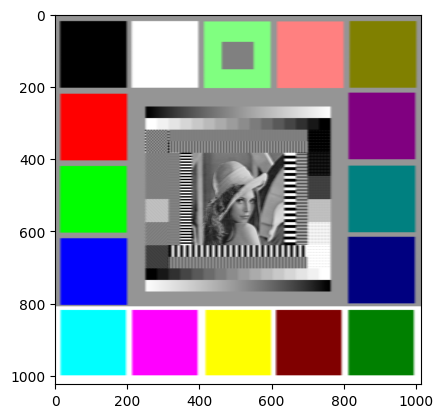

In [13]:
# Lê a imagem de entrada
img = cv2.imread('./Resources/testpat.1k.color2.tif', cv2.IMREAD_COLOR)
# Converte para RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Transforma em array numpy
img = np.array(img)

# Input mask
mask = get_mask_from_txt('./Resources/mask2.txt')

# Aplica a correlação
result = correlation(img, mask) # Tente algum outro filtro lá de cima!
plt.imshow(prepare_to_show(result))
